# How COVID has influenced Bike use in the Bay Area
## by Grant Glass

## Preliminary Wrangling

> Bay Wheels is a regional public bicycle sharing system in the San Francisco Bay Area, California operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially re-launched as Ford GoBike in a partnership with Ford Motor Company. After Motivate's acquisition by Lyft, the system was subsequently renamed to Bay Wheels in June 2019. The system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose.


>On Mar 17, 2020 San Francisco enacted a shelter in place, which drastically reduced car traffic in the bay area. I am going to investigate how this might have reduced or increased ridership.

>In response to COVID(starting on March 19th), Bay Wheels offered a 30-day program to give critical healthcare workers free bikeshare memberships. Eligible healthcare workers can sign up through their employer to access unlimited 45-minute trips on Classic bikes and ebikes for 30 days. Did anyone take advantage of this?

>https://www.lyft.com/bikes/bay-wheels/system-data

>This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. I will merge both January, Februrary, and March's data together. The dataset includes the following features : Trip Duration in seconds , Start Time and Date , End Time and Date , Start Station ID , Start Station Name , Start Station Latitude , Start Station Longitude , End Station ID , End Station Name, End Station Latitude , End Station Longitude , Bike ID , User Type , and  Rental Access Method. 

The dataset is the result of merging 4 files(January, February, March, April (2020)). It has 23 features and 989,266 rows.

Pulling the data down and looking at it on Excel shows us that

January's Data: 295855 trips
February's Data: 432355 trips
March's Data: 176800 trips
April's Data: 84260 trips

We see that there is a clear downturn in April on overall trips.
But what can the data tell us about the behaviors of the users of Bay Wheels?

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import matplotlib.style as style 
from matplotlib.collections import LineCollection
import seaborn as sb
import os
import matplotlib.image as mpimg

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# merge all the files together
currentDir = os.getcwd()
path = currentDir+'/data/'
text_files = os.listdir(path)

# loop to get all files together
file_list = []
for text_file in text_files:
    filename = path+text_file
    df = pd.read_csv(filename)
    file_list.append(df)
df_merge = pd.concat(file_list) 
df_merge.head()

/Users/grantglass/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/grantglass/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


,bike_id,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,ended_at,member_casual,rental_access_method,ride_id,rideable_type,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,started_at,user_type
0,13052.0,83118.0,400.0,37.804272,-122.433537,Buchanan St at North Point St,2020-02-01 14:29:06.2630,NaN,NaN,NaN,NaN,NaN,400.0,37.804272,-122.433537,Buchanan St at North Point St,2020-01-31 15:23:47.7330,NaN,Customer
1,12235.0,68239.0,99.0,37.767037,-122.415443,Folsom St at 15th St,2020-02-01 10:37:51.0000,NaN,NaN,NaN,NaN,NaN,99.0,37.767037,-122.415443,Folsom St at 15th St,2020-01-31 15:40:31.6160,NaN,Subscriber
2,12822.0,55407.0,197.0,37.808848,-122.249680,El Embarcadero at Grand Ave,2020-02-01 09:11:44.3170,NaN,NaN,NaN,NaN,NaN,197.0,37.808848,-122.249680,El Embarcadero at Grand Ave,2020-01-31 17:48:16.6350,NaN,Customer
3,11705.0,54929.0,197.0,37.808848,-122.249680,El Embarcadero at Grand Ave,2020-02-01 09:08:32.6340,NaN,NaN,NaN,NaN,NaN,197.0,37.808848,-122.249680,El Embarcadero at Grand Ave,2020-01-31 17:53:03.4130,NaN,Customer
4,3673.0,55700.0,371.0,37.802746,-122.413579,Lombard St at Columbus Ave,2020-02-01 08:40:53.6460,NaN,NaN,NaN,NaN,NaN,12.0,37.796389,-122.394586,Pier 1/2 at The Embarcadero,2020-01-31 17:12:33.4600,NaN,Customer


In [3]:
df_merge.tail()

,bike_id,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,ended_at,member_casual,rental_access_method,ride_id,rideable_type,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,started_at,user_type
176794,999960.0,61.0,NaN,37.848476,-122.265779,NaN,2020-04-01 10:43:37,NaN,NaN,app,NaN,NaN,NaN,37.848493,-122.265797,NaN,2020-04-01 10:42:35,NaN,Subscriber
176795,999960.0,78.0,NaN,37.848477,-122.265815,NaN,2020-03-18 17:12:01,NaN,NaN,app,NaN,NaN,NaN,37.848499,-122.265794,NaN,2020-03-18 17:10:42,NaN,Subscriber
176796,633095.0,122.0,NaN,37.848485,-122.266063,NaN,2020-04-01 13:34:31,NaN,NaN,app,NaN,NaN,NaN,37.848507,-122.266010,NaN,2020-04-01 13:32:28,NaN,Subscriber
176797,633095.0,340.0,NaN,37.848497,-122.266029,NaN,2020-04-01 13:13:14,NaN,NaN,app,NaN,NaN,NaN,37.848530,-122.266013,NaN,2020-04-01 13:07:34,NaN,Subscriber
176798,633095.0,333.0,NaN,37.848446,-122.266022,NaN,2020-03-23 16:45:30,NaN,NaN,app,NaN,NaN,NaN,37.848625,-122.266660,NaN,2020-03-23 16:39:57,NaN,Subscriber


In [4]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 989266 entries, 0 to 176798
Data columns (total 19 columns):
bike_id                    905007 non-null float64
duration_sec               905007 non-null float64
end_station_id             471083 non-null float64
end_station_latitude       989124 non-null float64
end_station_longitude      989124 non-null float64
end_station_name           472357 non-null object
end_time                   905007 non-null object
ended_at                   84259 non-null object
member_casual              84259 non-null object
rental_access_method       617858 non-null object
ride_id                    84259 non-null object
rideable_type              84259 non-null object
start_station_id           472139 non-null float64
start_station_latitude     989266 non-null float64
start_station_longitude    989266 non-null float64
start_station_name         473372 non-null object
start_time                 905007 non-null object
started_at                 84259 no

We can see that the April data is tagged a little differently. We will neeed to address this cleanup.

In [5]:
df_merge.dtypes

bike_id                    float64
duration_sec               float64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name            object
end_time                    object
ended_at                    object
member_casual               object
rental_access_method        object
ride_id                     object
rideable_type               object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name          object
start_time                  object
started_at                  object
user_type                   object
dtype: object

### What is the structure of your dataset?

> The dataset is the result of merging 4 files(January, February, March, April (2020)). It has 23 features and 989,266 rows. 

### What is/are the main feature(s) of interest in your dataset?

> Did Covid19 influence ridership? Are people biking for longer?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Trip Duration, Start Time and Date , End Time and Date. Maybe distance--but this will take some mapping. 

## More Wrangling

In [6]:
df_merge.sample(10)

,bike_id,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,ended_at,member_casual,rental_access_method,ride_id,rideable_type,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,started_at,user_type
77905,NaN,NaN,481.0,37.781100,-122.447400,O'Farrell St at Masonic Ave,NaN,2020-04-07 12:22:04,member,NaN,911541A74ABB629B,electric_bike,457.0,37.763600,-122.464100,7th Ave at Irving St,NaN,2020-04-07 12:11:17,NaN
63111,12255.0,700.0,76.0,37.771662,-122.422423,McCoppin St at Valencia St,2020-01-13 17:51:02.2010,NaN,NaN,NaN,NaN,NaN,3.0,37.786375,-122.404904,Powell St BART Station (Market St at 4th St),2020-01-13 17:39:21.3100,NaN,Customer
125505,886200.0,1862.0,NaN,37.342587,-121.883945,NaN,2020-01-30 17:03:17,NaN,NaN,app,NaN,NaN,NaN,37.342551,-121.883960,NaN,2020-01-30 16:32:14,NaN,Subscriber
224613,258089.0,1525.0,NaN,37.795238,-122.419760,NaN,2020-02-11 19:47:53,NaN,NaN,app,NaN,NaN,NaN,37.769697,-122.403549,NaN,2020-02-11 19:22:27,NaN,Subscriber
251027,633655.0,646.0,NaN,37.789559,-122.391304,NaN,2020-02-25 08:36:28,NaN,NaN,app,NaN,NaN,NaN,37.773763,-122.409978,NaN,2020-02-25 08:25:41,NaN,Subscriber
170336,118075.0,280.0,NaN,37.774110,-122.395383,NaN,2020-01-28 14:31:40,NaN,NaN,app,NaN,NaN,NaN,37.767782,-122.392240,NaN,2020-01-28 14:27:00,NaN,Subscriber
102399,182801.0,3050.0,NaN,37.765921,-122.449315,NaN,2020-03-27 18:39:43,NaN,NaN,app,NaN,NaN,440.0,37.765910,-122.449257,Carl St at Cole St,2020-03-27 17:48:53,NaN,Customer
176251,251336.0,1630.0,NaN,37.807736,-122.420009,NaN,2020-03-07 14:53:12,NaN,NaN,app,NaN,NaN,NaN,37.806903,-122.439283,NaN,2020-03-07 14:26:02,NaN,Customer
123870,909953.0,245.0,NaN,37.326428,-121.882592,NaN,2020-02-04 12:56:40,NaN,NaN,app,NaN,NaN,NaN,37.332419,-121.876686,NaN,2020-02-04 12:52:35,NaN,Customer
97678,480965.0,247.0,100.0,37.767100,-122.410662,Bryant St at 15th St,2020-03-04 17:01:32,NaN,NaN,app,NaN,NaN,110.0,37.763708,-122.415204,17th & Folsom Street Park (17th St at Folsom St),2020-03-04 16:57:24,NaN,Subscriber


Let's first make a consistent id column

In [7]:
df_merge['id'] = df_merge['bike_id'].fillna(df_merge['ride_id'])
df_merge.drop(['bike_id', 'ride_id'], axis=1, inplace=True)
df_merge.id = df_merge.id.astype(str)

In [8]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 989266 entries, 0 to 176798
Data columns (total 18 columns):
duration_sec               905007 non-null float64
end_station_id             471083 non-null float64
end_station_latitude       989124 non-null float64
end_station_longitude      989124 non-null float64
end_station_name           472357 non-null object
end_time                   905007 non-null object
ended_at                   84259 non-null object
member_casual              84259 non-null object
rental_access_method       617858 non-null object
rideable_type              84259 non-null object
start_station_id           472139 non-null float64
start_station_latitude     989266 non-null float64
start_station_longitude    989266 non-null float64
start_station_name         473372 non-null object
start_time                 905007 non-null object
started_at                 84259 non-null object
user_type                  905007 non-null object
id                         989266 no

Let's drop uneeded categories. Some of these like ridable_type and rental_access_method are completely different variables. 

user_type and member_casual are essentially the same thing. let's combine them.

In [9]:
df_merge.drop(['end_station_id', 'end_station_name', 'start_station_id', 'start_station_name', 'rideable_type','rental_access_method' ], axis=1, inplace=True)
df_merge['type_of_user'] = df_merge['user_type'].fillna(df_merge['member_casual'])
df_merge.drop(['user_type', 'member_casual'], axis=1, inplace=True)

In [10]:
df_merge.sample(10)

,duration_sec,end_station_latitude,end_station_longitude,end_time,ended_at,start_station_latitude,start_station_longitude,start_time,started_at,id,type_of_user
132190,961.0,37.761012,-122.434334,2020-01-18 08:55:33,NaN,37.746992,-122.417644,2020-01-18 08:39:32,NaN,109623.0,Subscriber
1566,442.0,37.800214,-122.253810,2020-03-29 17:40:14.9610,NaN,37.800214,-122.253810,2020-03-29 17:32:52.1490,NaN,9854.0,Customer
58170,343.0,37.806970,-122.266588,2020-02-16 10:56:30.2600,NaN,37.800516,-122.272080,2020-02-16 10:50:46.4660,NaN,10122.0,Customer
188597,1119.0,37.803850,-122.402246,2020-01-20 17:46:04,NaN,37.773243,-122.391587,2020-01-20 17:27:25,NaN,171025.0,Customer
31901,276.0,37.808894,-122.256460,2020-03-07 23:37:07.0420,NaN,37.806970,-122.266588,2020-03-07 23:32:30.8290,NaN,12394.0,Customer
225437,701.0,37.788160,-122.418319,2020-02-03 15:26:47,NaN,37.769807,-122.402204,2020-02-03 15:15:06,NaN,730653.0,Subscriber
65792,344.0,37.333554,-121.884387,2020-03-13 23:03:52,NaN,37.325460,-121.875467,2020-03-13 22:58:08,NaN,680202.0,Subscriber
69602,NaN,37.769100,-122.386300,NaN,2020-04-26 19:43:36,37.761600,-122.390600,NaN,2020-04-26 19:21:07,2CEB83D1D4EBB781,casual
247468,979.0,37.787025,-122.404518,2020-01-18 15:12:57,NaN,37.787290,-122.394380,2020-01-18 14:56:37,NaN,505750.0,Subscriber
170865,321.0,37.805117,-122.415228,2020-03-07 15:57:52,NaN,37.800496,-122.410887,2020-03-07 15:52:30,NaN,930498.0,Customer


Let's set the user types to be consistent with Jan-March and April.

In [11]:
df_merge.type_of_user = df_merge.type_of_user.astype(str)
df_merge['type_of_user'] = df_merge['type_of_user'].str.replace('casual', 'Customer')
df_merge['type_of_user'] = df_merge['type_of_user'].str.replace('member', 'Subscriber')

Let's calculate the duration in seconds of the April Data

In [12]:
df_merge['started_at'] = pd.to_datetime(df_merge['started_at'])
df_merge['ended_at'] = pd.to_datetime(df_merge['ended_at'])

In [13]:
df_merge.sample(10)

,duration_sec,end_station_latitude,end_station_longitude,end_time,ended_at,start_station_latitude,start_station_longitude,start_time,started_at,id,type_of_user
403022,279.0,37.792793,-122.392355,2020-02-22 14:00:05,NaT,37.797280,-122.398436,2020-02-22 13:55:26,NaT,320748.0,Subscriber
392928,532.0,37.789279,-122.415322,2020-02-20 17:58:52,NaT,37.794611,-122.394859,2020-02-20 17:49:59,NaT,977184.0,Subscriber
428882,1099.0,37.808645,-122.412233,2020-02-22 12:32:57,NaT,37.806180,-122.404503,2020-02-22 12:14:38,NaT,674413.0,Customer
249332,686.0,37.767175,-122.390921,2020-01-31 08:11:13,NaT,37.787646,-122.398097,2020-01-31 07:59:46,NaT,909785.0,Subscriber
123495,199.0,37.335062,-121.902394,2020-02-01 11:21:10,NaT,37.332089,-121.908530,2020-02-01 11:17:50,NaT,891970.0,Subscriber
60534,1532.0,37.795001,-122.399970,2020-02-15 10:37:35.4520,NaT,37.796389,-122.394586,2020-02-15 10:12:02.4890,NaT,11314.0,Customer
263194,892.0,37.765052,-122.421866,2020-02-21 12:22:21,NaT,37.775814,-122.438086,2020-02-21 12:07:28,NaT,423348.0,Subscriber
335480,513.0,37.769768,-122.426325,2020-02-21 23:42:45,NaT,37.785886,-122.428224,2020-02-21 23:34:12,NaT,251187.0,Subscriber
15236,439.0,37.807813,-122.264496,2020-03-13 09:07:27.4830,NaT,37.795195,-122.273970,2020-03-13 09:00:07.9170,NaT,11131.0,Customer
107302,603.0,37.355693,-121.892251,2020-02-03 18:02:37.5650,NaT,37.339146,-121.884105,2020-02-03 17:52:33.6070,NaT,11207.0,Customer


In [14]:
df_merge['diff_sec'] = df_merge['ended_at'] - df_merge['started_at']
df_merge['diff_sec']=df_merge['diff_sec']/np.timedelta64(1,'s')

In [15]:
df_merge.sample(10)

,duration_sec,end_station_latitude,end_station_longitude,end_time,ended_at,start_station_latitude,start_station_longitude,start_time,started_at,id,type_of_user,diff_sec
44235,NaN,37.747800,-122.420200,NaN,2020-04-27 16:18:06,37.773900,-122.421000,NaN,2020-04-27 16:08:58,0261D68E8AA1A46E,Subscriber,548.0
279693,886.0,37.803797,-122.413415,2020-02-28 17:21:00,NaT,37.776773,-122.395269,2020-02-28 17:06:14,NaT,522669.0,Subscriber,NaN
66633,348.0,37.333386,-121.878576,2020-03-13 09:54:19,NaT,37.326374,-121.876595,2020-03-13 09:48:30,NaT,608638.0,Subscriber,NaN
13454,670.0,37.858473,-122.253253,2020-02-26 22:13:16.8630,NaT,37.850578,-122.278175,2020-02-26 22:02:06.6030,NaT,2165.0,Customer,NaN
300748,231.0,37.774599,-122.399857,2020-02-04 18:01:08,NaT,37.780185,-122.403624,2020-02-04 17:57:16,NaT,612342.0,Subscriber,NaN
64143,514.0,37.781074,-122.411738,2020-02-14 09:47:00.9370,NaT,37.773414,-122.427317,2020-02-14 09:38:26.8940,NaT,9686.0,Customer,NaN
153793,268.0,37.751819,-122.426614,2020-02-16 14:36:48,NaT,37.752105,-122.419724,2020-02-16 14:32:20,NaT,978236.0,Subscriber,NaN
235564,854.0,37.786328,-122.397896,2020-02-27 09:52:21,NaT,37.771364,-122.389267,2020-02-27 09:38:07,NaT,495138.0,Subscriber,NaN
138597,948.0,37.782626,-122.408089,2020-01-14 08:06:59,NaT,37.754351,-122.434542,2020-01-14 07:51:11,NaT,812844.0,Customer,NaN
136203,395.0,37.755936,-122.410515,2020-01-26 18:24:21,NaT,37.752280,-122.418928,2020-01-26 18:17:46,NaT,983955.0,Subscriber,NaN


In [16]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 989266 entries, 0 to 176798
Data columns (total 12 columns):
duration_sec               905007 non-null float64
end_station_latitude       989124 non-null float64
end_station_longitude      989124 non-null float64
end_time                   905007 non-null object
ended_at                   84259 non-null datetime64[ns]
start_station_latitude     989266 non-null float64
start_station_longitude    989266 non-null float64
start_time                 905007 non-null object
started_at                 84259 non-null datetime64[ns]
id                         989266 non-null object
type_of_user               989266 non-null object
diff_sec                   84259 non-null float64
dtypes: datetime64[ns](2), float64(6), object(4)
memory usage: 98.1+ MB


In [17]:
#Normalize format of date
df_merge['started_at'] = df_merge['started_at'].dt.strftime('%Y-%m-%d %H:%M:%S')
df_merge['ended_at'] = df_merge['ended_at'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [18]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 989266 entries, 0 to 176798
Data columns (total 12 columns):
duration_sec               905007 non-null float64
end_station_latitude       989124 non-null float64
end_station_longitude      989124 non-null float64
end_time                   905007 non-null object
ended_at                   989266 non-null object
start_station_latitude     989266 non-null float64
start_station_longitude    989266 non-null float64
start_time                 905007 non-null object
started_at                 989266 non-null object
id                         989266 non-null object
type_of_user               989266 non-null object
diff_sec                   84259 non-null float64
dtypes: float64(6), object(6)
memory usage: 98.1+ MB


In [19]:
df_merge.sample(10)

,duration_sec,end_station_latitude,end_station_longitude,end_time,ended_at,start_station_latitude,start_station_longitude,start_time,started_at,id,type_of_user,diff_sec
54422,319.0,37.852477,-122.270213,2020-03-03 07:15:34.1020,NaT,37.850578,-122.278175,2020-03-03 07:10:14.6340,NaT,9841.0,Customer,NaN
158454,1239.0,37.752780,-122.410192,2020-03-02 15:18:55,NaT,37.790518,-122.395631,2020-03-02 14:58:16,NaT,185002.0,Subscriber,NaN
113442,524.0,37.785881,-122.408915,2020-03-11 10:53:45,NaT,37.771431,-122.405787,2020-03-11 10:45:00,NaT,580474.0,Subscriber,NaN
353844,357.0,37.793067,-122.401122,2020-02-17 08:24:44,NaT,37.788300,-122.408531,2020-02-17 08:18:47,NaT,576664.0,Customer,NaN
42194,508.0,37.795392,-122.394203,2020-01-20 08:56:22.4800,NaT,37.775880,-122.393170,2020-01-20 08:47:54.4130,NaT,9558.0,Customer,NaN
286402,3414.0,37.808022,-122.475327,2020-01-13 10:22:15,NaT,37.800311,-122.460312,2020-01-13 09:25:21,NaT,600683.0,Subscriber,NaN
180339,252.0,37.764478,-122.402570,2020-02-26 19:18:57,NaT,37.761449,-122.397313,2020-02-26 19:14:45,NaT,239141.0,Subscriber,NaN
74799,1210.0,37.772658,-122.403681,2020-01-10 09:39:31.0750,NaT,37.750900,-122.427411,2020-01-10 09:19:20.1700,NaT,11512.0,Customer,NaN
233725,407.0,37.789677,-122.390428,2020-01-15 09:25:17,NaT,37.783830,-122.398870,2020-01-15 09:18:29,NaT,571397.0,Subscriber,NaN
304506,412.0,37.768007,-122.428520,2020-02-19 17:27:15,NaT,37.780769,-122.412321,2020-02-19 17:20:22,NaT,568857.0,Subscriber,NaN


In [20]:
#normalize columns
df_merge['started_time'] = df_merge['start_time'].fillna(df_merge['started_at'])
df_merge['ended_time'] = df_merge['end_time'].fillna(df_merge['ended_at'])

In [21]:
df_merge.sample(20)

,duration_sec,end_station_latitude,end_station_longitude,end_time,ended_at,start_station_latitude,start_station_longitude,start_time,started_at,id,type_of_user,diff_sec,started_time,ended_time
141859,458.0,37.720101,-122.429527,2020-02-02 17:52:33,NaT,37.732813,-122.434140,2020-02-02 17:44:54,NaT,249411.0,Subscriber,NaN,2020-02-02 17:44:54,2020-02-02 17:52:33
200328,202.0,37.773644,-122.448389,2020-01-30 19:21:21,NaT,37.775995,-122.445738,2020-01-30 19:17:58,NaT,190357.0,Subscriber,NaN,2020-01-30 19:17:58,2020-01-30 19:21:21
25213,544.0,37.774520,-122.409449,2020-03-10 08:40:25.3120,NaT,37.777547,-122.433274,2020-03-10 08:31:20.4590,NaT,11869.0,Customer,NaN,2020-03-10 08:31:20.4590,2020-03-10 08:40:25.3120
107410,134.0,37.775880,-122.393170,2020-01-02 10:59:37.0260,NaT,37.772000,-122.389970,2020-01-02 10:57:22.9610,NaT,10387.0,Customer,NaN,2020-01-02 10:57:22.9610,2020-01-02 10:59:37.0260
147362,2507.0,37.802746,-122.413579,2020-03-19 11:47:40,NaT,37.786375,-122.404904,2020-03-19 11:05:53,NaT,342535.0,Customer,NaN,2020-03-19 11:05:53,2020-03-19 11:47:40
54,808.0,37.812314,-122.260779,2020-03-31 20:28:37.3540,NaT,37.833294,-122.256224,2020-03-31 20:15:08.5340,NaT,9647.0,Customer,NaN,2020-03-31 20:15:08.5340,2020-03-31 20:28:37.3540
89783,473.0,37.763281,-122.407377,2020-03-01 21:06:03,NaT,37.757704,-122.391885,2020-03-01 20:58:09,NaT,380070.0,Subscriber,NaN,2020-03-01 20:58:09,2020-03-01 21:06:03
25227,1176.0,37.768265,-122.420110,2020-01-24 21:42:38.3810,NaT,37.784872,-122.400876,2020-01-24 21:23:01.5000,NaT,10832.0,Customer,NaN,2020-01-24 21:23:01.5000,2020-01-24 21:42:38.3810
269011,1576.0,37.764965,-122.442246,2020-01-13 17:03:58,NaT,37.792370,-122.400094,2020-01-13 16:37:42,NaT,612352.0,Subscriber,NaN,2020-01-13 16:37:42,2020-01-13 17:03:58
10424,1398.0,37.781074,-122.411738,2020-01-29 16:40:48.4610,NaT,37.763281,-122.407377,2020-01-29 16:17:29.5190,NaT,10982.0,Customer,NaN,2020-01-29 16:17:29.5190,2020-01-29 16:40:48.4610


In [22]:
df_merge.drop(['started_at', 'ended_at'], axis=1, inplace=True)
df_merge.drop(['start_time', 'end_time'], axis=1, inplace=True)

In [23]:
df_merge.sample(20)

,duration_sec,end_station_latitude,end_station_longitude,start_station_latitude,start_station_longitude,id,type_of_user,diff_sec,started_time,ended_time
198261,295.0,37.764555,-122.410345,37.764921,-122.422394,895211.0,Subscriber,NaN,2020-02-07 18:21:33,2020-02-07 18:26:29
330833,482.0,37.779588,-122.414117,37.785132,-122.419218,122840.0,Subscriber,NaN,2020-02-26 17:05:11,2020-02-26 17:13:14
79395,569.0,37.776513,-122.411306,37.777547,-122.433274,11167.0,Customer,NaN,2020-02-11 08:11:44.3540,2020-02-11 08:21:13.7720
157138,166.0,37.764202,-122.466248,37.764139,-122.462058,401943.0,Subscriber,NaN,2020-01-31 20:15:18,2020-01-31 20:18:05
258143,924.0,37.770083,-122.429156,37.775052,-122.444065,520986.0,Subscriber,NaN,2020-02-04 07:47:13,2020-02-04 08:02:38
12510,300.0,37.870139,-122.268422,37.875112,-122.260553,595.0,Customer,NaN,2020-01-29 08:06:02.1480,2020-01-29 08:11:02.8230
37850,909.0,37.769188,-122.422285,37.775235,-122.397437,9514.0,Customer,NaN,2020-03-05 23:10:54.3920,2020-03-05 23:26:03.9490
82814,NaN,37.800200,-122.253800,37.812700,-122.247200,3E729833BDBFF78F,Subscriber,656.0,2020-04-03 13:03:11,2020-04-03 13:14:07
81713,465.0,37.785377,-122.396906,37.798014,-122.405950,9878.0,Customer,NaN,2020-01-08 20:51:22.8950,2020-01-08 20:59:08.0420
100690,1026.0,37.752105,-122.419724,37.757704,-122.391885,10271.0,Customer,NaN,2020-01-04 11:24:56.4800,2020-01-04 11:42:02.4900


In [24]:
df_merge['duration_seconds'] = df_merge['duration_sec'].fillna(df_merge['diff_sec'])
df_merge.drop(['duration_sec', 'diff_sec'], axis=1, inplace=True)

In [25]:
df_merge.sample(20)

,end_station_latitude,end_station_longitude,start_station_latitude,start_station_longitude,id,type_of_user,started_time,ended_time,duration_seconds
185592,37.770009,-122.448568,37.772236,-122.430154,560821.0,Subscriber,2020-01-25 17:58:02,2020-01-25 18:08:16,614.0
184019,37.777416,-122.441838,37.762338,-122.438690,500854.0,Subscriber,2020-02-22 21:01:44,2020-02-22 21:17:27,943.0
103746,37.787492,-122.398285,37.781074,-122.411738,11086.0,Customer,2020-02-04 16:59:59.3880,2020-02-04 17:07:48.6690,469.0
8207,37.781650,-122.415408,37.787349,-122.416651,241.0,Customer,2020-03-20 11:02:05.1810,2020-03-20 11:05:13.2660,188.0
103682,37.776619,-122.417385,37.783899,-122.408445,11243.0,Customer,2020-01-03 11:31:42.6730,2020-01-03 11:42:30.8500,648.0
415439,37.789544,-122.404113,37.801576,-122.430649,110949.0,Subscriber,2020-02-27 08:59:36,2020-02-27 09:16:09,992.0
93129,37.788300,-122.408531,37.760458,-122.387540,539789.0,Subscriber,2020-03-04 07:01:45,2020-03-04 07:12:58,672.0
34101,37.795392,-122.394203,37.775880,-122.393170,10312.0,Customer,2020-01-22 17:53:24.7470,2020-01-22 18:04:59.6800,694.0
115495,37.319396,-121.905730,37.309866,-121.926131,249361.0,Subscriber,2020-02-25 01:04:54,2020-02-25 01:27:48,1374.0
307134,37.776085,-122.409179,37.781149,-122.394662,890216.0,Subscriber,2020-02-11 18:01:21,2020-02-11 18:12:15,653.0


## Univariate Exploration

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


Text(0.5, 0, 'Duration in seconds')

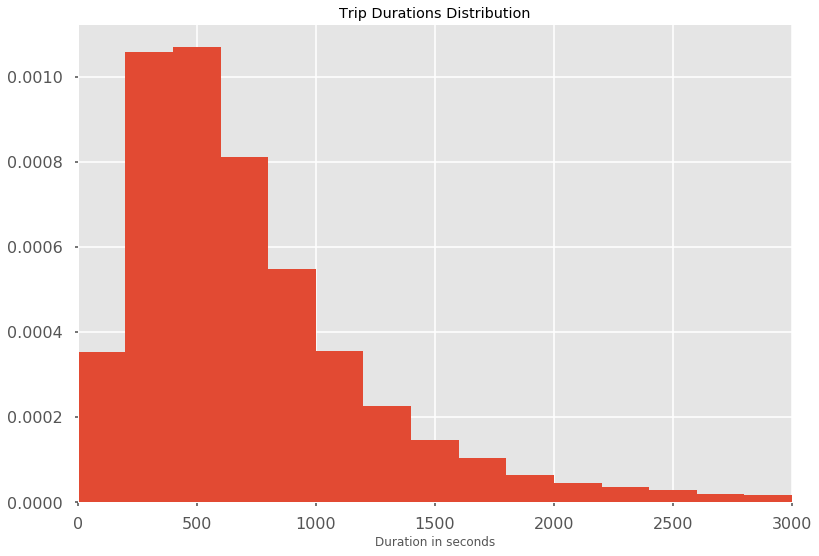

In [128]:
# Look at the average trip length
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')
bin_edges = np.arange(0, df_merge['duration_seconds'].max() + 200 , 200)
plt.hist(data = df_merge , x = 'duration_seconds' , normed=True, bins = bin_edges)
plt.xlim(0,3000)
plt.title('Trip Durations Distribution')
plt.xlabel('Duration in seconds')


Can we see anything different with a different type of plot?

Text(0.5, 1.0, 'Trip Durations Distribution')

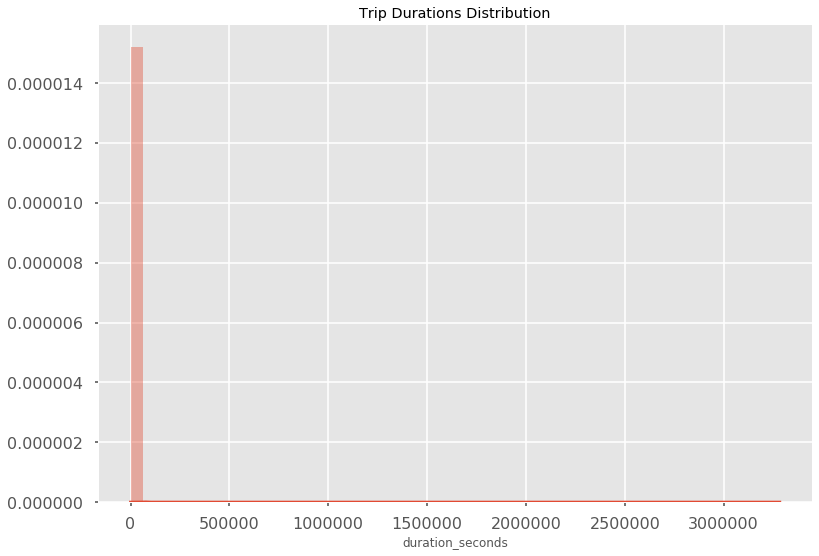

In [129]:
sb.distplot(df_merge.duration_seconds.dropna())
plt.title('Trip Durations Distribution')

We do see a huge difference in scale.

In [381]:
df_merge.duration_seconds.mean()

914.2554166422378

This graph is a little hard to look at, maybe minutes could create a better looking graph?

In [26]:
df_merge['duration_min'] = df_merge['duration_seconds'] / 60
df_merge['duration_min'].value_counts()

7.016667      1216
6.783333      1212
5.600000      1206
5.916667      1205
6.166667      1204
              ... 
155.516667       1
173.266667       1
122.700000       1
673.916667       1
128.166667       1
Name: duration_min, Length: 9828, dtype: int64

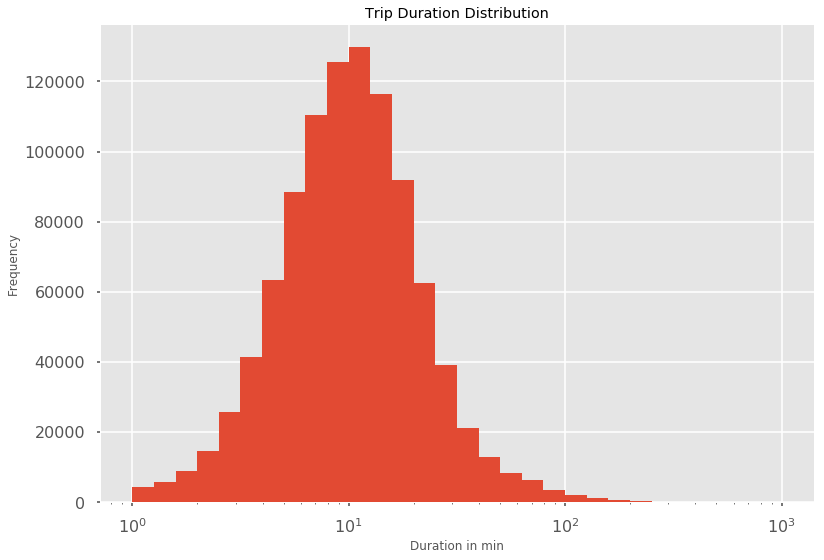

In [383]:
bin_edges = 10**np.arange(0 , 3+0.1 , 0.1)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df_merge , x = 'duration_min' , bins = bin_edges);
plt.xticks(ticks,labels);
plt.xlabel('Duration in min');
plt.xscale('log');
plt.title('Trip Duration Distribution')
plt.ylabel('Frequency');

In [384]:
df_merge.duration_min.mean()

15.237590277371043

In [122]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 989205 entries, 0 to 176798
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   start_station_latitude   989205 non-null  float64       
 1   start_station_longitude  989205 non-null  float64       
 2   end_station_latitude     989063 non-null  float64       
 3   end_station_longitude    989063 non-null  float64       
 4   id                       989205 non-null  object        
 5   type_of_user             989205 non-null  object        
 6   started_time             989205 non-null  object        
 7   ended_time               989205 non-null  object        
 8   duration_seconds         989205 non-null  float64       
 9   duration_min             989205 non-null  float64       
 10  start_time               989205 non-null  datetime64[ns]
 11  start_year               989205 non-null  int64         
 12  start_month     

This looks much better. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I was interested in time, to see if any changes have occured since COVID19. So it makes sense to see what the distributions of the trips were. The seconds visulaization was hard to read and the mean didn't look quite right. As in the distribution was too diverse. I did some transformations by creating a minute duration instead of the second. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> After look at the second, it looks like 1-2 super riders have gone for very long trips, which is influencing the distrobution. I then tried to look at minutes instead of seconds to try to level the scale a little more. This ended up producing a much better looking distribution and mean. 

Lots of short and very long trips. Not many inbetween. 

## Bivariate Exploration

Now let's look at time. First we need to extract the date data from the start_time column.

In [27]:
df_merge['start_time'] = pd.to_datetime(df_merge['started_time'])
df_merge['start_year'] = df_merge['start_time'].dt.year
df_merge['start_month'] = df_merge['start_time'].dt.month
df_merge['start_day'] = df_merge['start_time'].dt.day

In [111]:
df_merge.dtypes

start_station_latitude            float64
start_station_longitude           float64
end_station_latitude              float64
end_station_longitude             float64
id                                 object
type_of_user                       object
started_time                       object
ended_time                         object
duration_seconds                  float64
duration_min                      float64
start_time                 datetime64[ns]
start_year                          int64
start_month                         int64
start_day                           int64
dtype: object

In [112]:
#print out csv to move to third party GIS software
df_merge.to_csv('baywheels_covid_gis.csv', encoding='utf-8', index=False)

In [28]:
#create month/day column
df_merge['timing'] = df_merge['start_time'].dt.strftime('%m%d')

In [114]:
df_merge.sample(2)

,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,id,type_of_user,started_time,ended_time,duration_seconds,duration_min,start_time,start_year,start_month,start_day,timing
160883,37.755373,-122.427946,37.791905,-122.447912,564912.0,Subscriber,2020-02-16 12:57:23,2020-02-16 15:17:10,8386.0,139.766667,2020-02-16 12:57:23,2020,2,16,0216
257508,37.774913,-122.405401,37.783018,-122.420478,530703.0,Subscriber,2020-02-20 12:11:43,2020-02-20 12:21:58,615.0,10.250000,2020-02-20 12:11:43,2020,2,20,0220


Text(0.5, 1.0, 'Trip Durations Distribution')

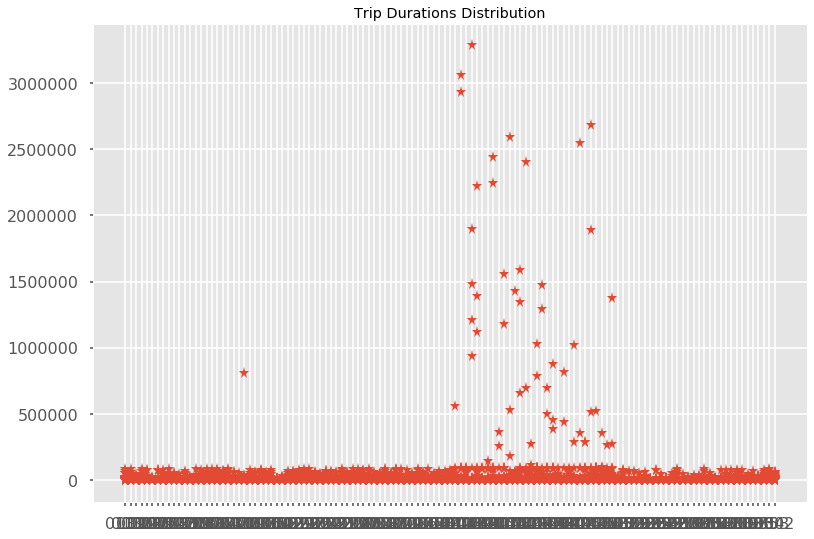

In [130]:
plt.plot(df_merge['timing'], df_merge['duration_seconds'], '*')
plt.title('Trip Durations Distribution')

There is a clear uptick in length of rides in April.

In [392]:
df_merge.loc[df_merge['duration_seconds'].idxmax()]

,end_station_latitude,end_station_longitude,start_station_latitude,start_station_longitude,id,type_of_user,started_time,ended_time,duration_seconds,duration_min,start_time,start_year,start_month,start_day,timing
44993,37.801319,-122.262642,37.816073,-122.267886,135.0,Customer,2020-01-18 15:43:53.3980,2020-01-18 15:52:59.8200,546.0,9.100000,2020-01-18 15:43:53.398,2020,1,18,0118
44993,37.764765,-122.420091,37.763708,-122.415204,1621.0,Customer,2020-02-19 19:04:36.9400,2020-02-19 19:08:30.4640,233.0,3.883333,2020-02-19 19:04:36.940,2020,2,19,0219
44993,37.769300,-122.426800,37.752100,-122.419700,9C948DDE6C3514A5,Customer,2020-04-09 11:25:30,2020-05-17 11:34:22,3283732.0,54728.866667,2020-04-09 11:25:30.000,2020,4,9,0409
44993,37.767037,-122.415443,37.778742,-122.392741,9529.0,Customer,2020-03-04 16:49:55.1730,2020-03-04 16:59:26.3170,571.0,9.516667,2020-03-04 16:49:55.173,2020,3,4,0304


We can see the longest user actually kept the bike for over a month. So it looks like many users took advantage of this opportunity to ride the bikes free for 30 days. 

Text(0.5, 1.0, 'Trip Durations Distribution')

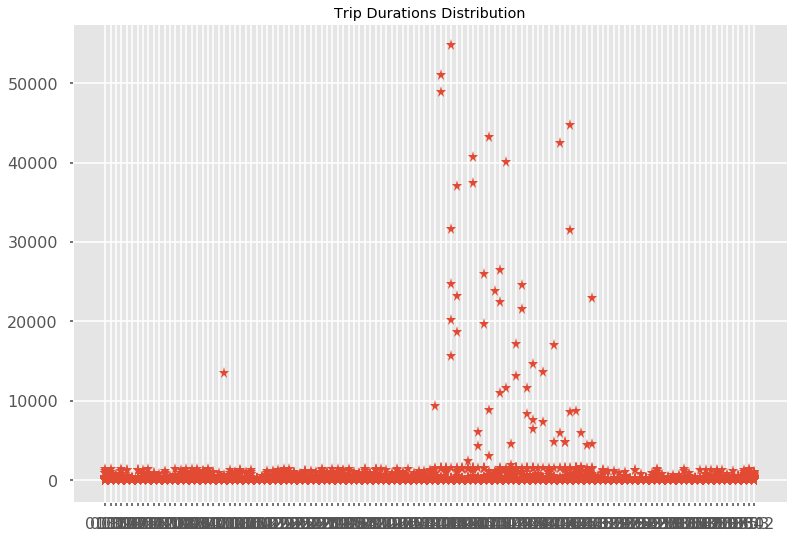

In [131]:
plt.plot(df_merge['timing'], df_merge['duration_min'], '*')
plt.title('Trip Durations Distribution')

The darkness on the bottom is hard to read. Let's try to get a density plot to have a better idea.

Text(0.5, 1.0, 'Density of Trips')

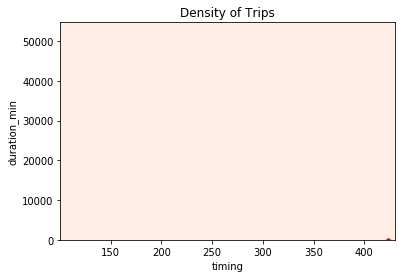

In [29]:
#density plot
sb.kdeplot(df_merge.timing, df_merge.duration_min, cmap="Reds", shade=True, bw=.15)
plt.title('Density of Trips')

Ok so there is a clear increase towards the end of April on the frequency of the rides.
Can we visualize this differently to see this trend a little better?

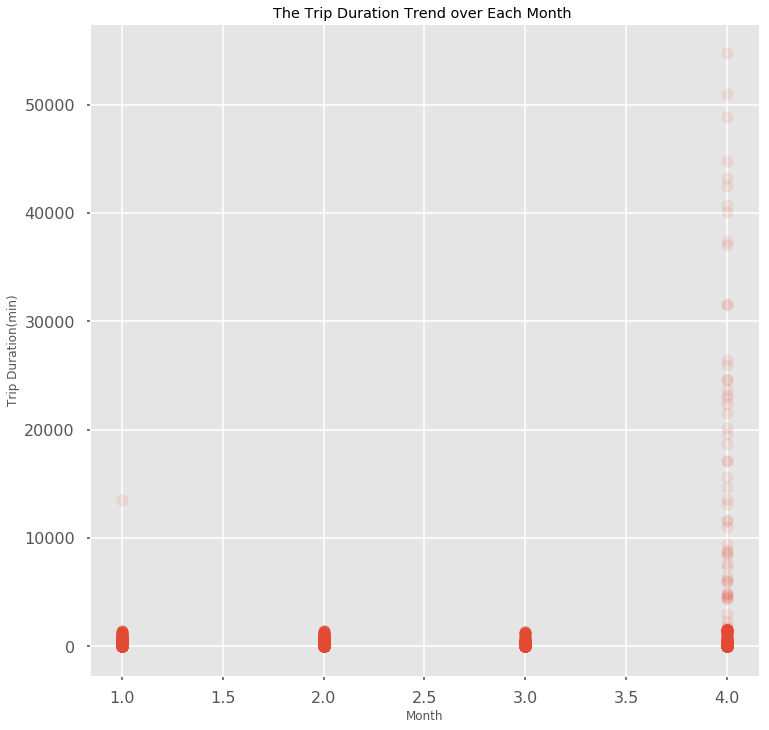

In [395]:
plt.figure(figsize = [12,12]) # make the whole figure bigger to show all 
plt.scatter(data = df_merge , x = 'start_month' , y = 'duration_min' , alpha = 0.1 )
plt.title('The Trip Duration Trend over Each Month ')
plt.xlabel('Month')
plt.ylabel('Trip Duration(min)');

In [115]:
#eliminate any missing data that is zero
df_merge = df_merge[df_merge.start_station_latitude != 0]
df_merge = df_merge[df_merge.end_station_latitude != 0]

we can see a clear increase of trip durations during COVID and the promotion

In [116]:
#from https://stackoverflow.com/questions/29545704/fast-haversine-approximation-python-pandas/29546836#29546836
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [117]:
#use this to calculate distance between start and end points. 
df_merge['distance'] = haversine_np(df_merge['start_station_longitude'],df_merge['start_station_latitude'],df_merge['end_station_longitude'],df_merge['end_station_latitude'])

In [118]:
df_merge['distance'].value_counts()

0.000000    21322
1.010196      967
2.170170      793
1.364479      789
0.709665      771
            ...  
2.512752        1
0.169963        1
1.965924        1
2.080919        1
2.548165        1
Name: distance, Length: 632287, dtype: int64

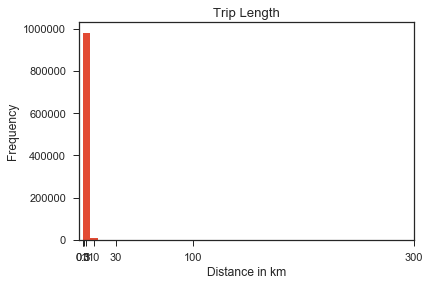

In [555]:
plt.hist(data = df_merge.dropna(), x = 'distance');
plt.xticks(ticks,labels);
plt.xlabel('Distance in km');
plt.title('Trip Length')
plt.ylabel('Frequency');

Another very hard to read graph. Let's see if we can't improve it. 

Text(13.381,0.5,u'Distance in km')

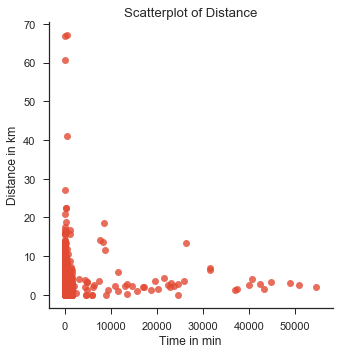

In [556]:
sb.set_context("notebook", font_scale=1.1)
sb.set_style("ticks")


sb.lmplot('duration_min', 
           'distance', 
           data=df_merge, 
           fit_reg=False) 

# Set title
plt.title('Scatterplot of Distance')

# Set x-axis label
plt.xlabel('Time in min')

# Set y-axis label
plt.ylabel('Distance in km')

In [557]:
df_merge.loc[df_merge['distance'].idxmax()]

,end_station_latitude,end_station_longitude,start_station_latitude,start_station_longitude,id,type_of_user,started_time,ended_time,duration_seconds,duration_min,start_time,start_year,start_month,start_day,timing,distance
74432,37.776619,-122.417385,37.759200,-122.409851,12358.0,Customer,2020-01-10 10:28:47.6860,2020-01-10 10:39:00.3830,612.0,10.200000,2020-01-10 10:28:47.686,2020,1,10,0110,2.045648
74432,37.778768,-122.415929,37.781074,-122.411738,9860.0,Customer,2020-02-12 07:35:10.2910,2020-02-12 07:41:06.1810,355.0,5.916667,2020-02-12 07:35:10.291,2020,2,12,0212,0.448509
74432,37.773700,-122.411600,37.332400,-121.890300,A93B0974D332E812,Customer,2020-04-12 18:41:01,2020-04-13 01:05:49,23088.0,384.800000,2020-04-12 18:41:01.000,2020,4,12,0412,67.186520
74432,37.330216,-121.886008,37.337014,-121.889081,424354.0,Subscriber,2020-03-03 12:53:45,2020-03-03 12:59:04,318.0,5.300000,2020-03-03 12:53:45.000,2020,3,3,0303,0.802716


In [558]:
df_merge.dtypes

end_station_latitude              float64
end_station_longitude             float64
start_station_latitude            float64
start_station_longitude           float64
id                                 object
type_of_user                       object
started_time                       object
ended_time                         object
duration_seconds                  float64
duration_min                      float64
start_time                 datetime64[ns]
start_year                          int64
start_month                         int64
start_day                           int64
timing                             object
distance                          float64
dtype: object

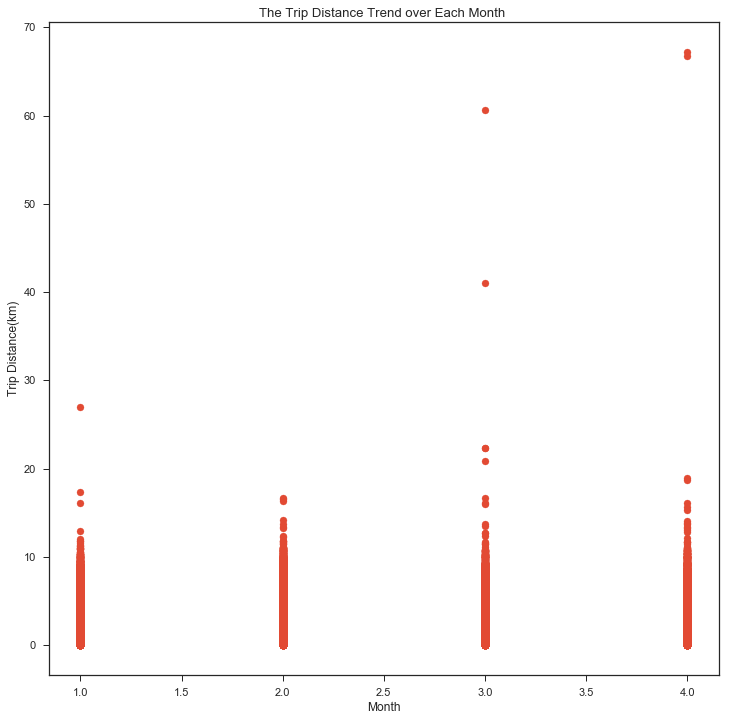

In [559]:
plt.figure(figsize = [12,12]) 
plt.scatter(data = df_merge , x = 'start_month' , y = 'distance', )
plt.title('The Trip Distance Trend over Each Month ')
plt.xlabel('Month')
plt.ylabel('Trip Distance(km)');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> After looking at the distribution of ride duration, I wanted to see how the ride duration changed over the course of the first few months of this year and whether or not COVID have any impact on it. I found that one datapoint was throwing everything off. It was so much longer that it had to be an error (someone forgot to check the bike back in). After taking that off, it looked like the ride duration stayed pretty consistent throughout. By looking at the duration each month, I was able to see that ridership had gone down signifigantly. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Well, I realizes that many riders might return their bikes to the same station that they got them from (essentially going 0 km). Also, it looks like there was an uptick in bikes midway through january, which is puzzling because typically people try to adopt healthy habits in the first of the year, but maybe these people were getting their exercise at a gym instead. 

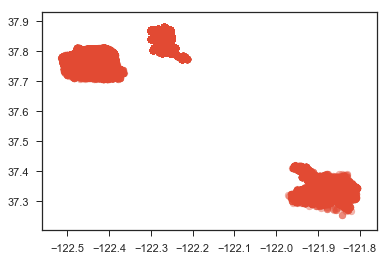

In [560]:
plt.scatter(data = df_merge , x="start_station_longitude", y="start_station_latitude", alpha=0.4)

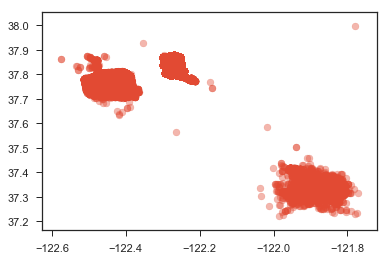

In [561]:
plt.scatter(data = df_merge , x="end_station_longitude", y="end_station_latitude", alpha=0.4)

It looks like many of these trips are returned to random places, which makes sense as to why the end_station column was commonly blank.

It is hard to see these without an underlying map, let's see if we can change that.  

Let's try and see this better on a map, using open streetmaps

In [38]:
BBox = (df_merge.start_station_longitude.min(),   df_merge.end_station_longitude.max(),      
         df_merge.start_station_latitude.min(), df_merge.end_station_latitude.max())
BBox

(-122.5142303333, -121.77272166670001, 37.2530496667, 37.9959416667)

In [564]:
#read the map from the min/max
ruh_m = plt.imread('map.png')

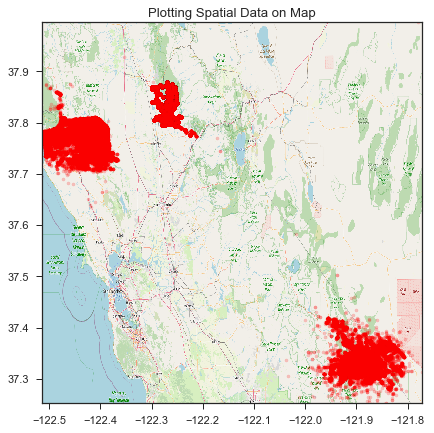

In [569]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df_merge.end_station_longitude, df_merge.end_station_latitude, zorder=1, alpha= 0.2, c='r', s=10)
ax.set_title('Plotting Spatial Data on Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

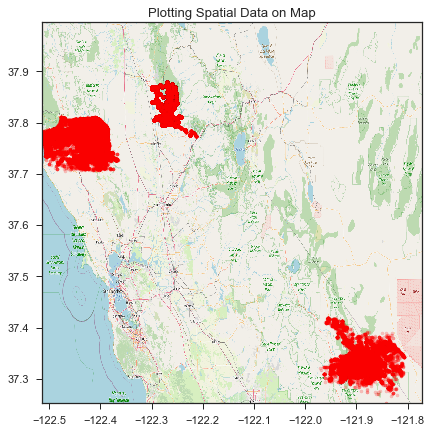

In [570]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df_merge.start_station_longitude, df_merge.start_station_latitude, zorder=1, alpha= 0.2, c='r', s=10)
ax.set_title('Plotting Spatial Data on Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

This map doesn't look quite right, so lets try this in a mapping program

## Multivariate Exploration

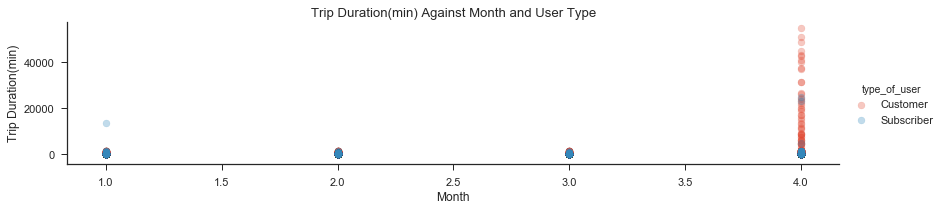

In [459]:
g = sb.FacetGrid(data =  df_merge, hue = 'type_of_user', aspect=4)
g.map(plt.scatter, 'start_month','duration_min', alpha = .3)
g.add_legend()
plt.title('Trip Duration(min) Against Month and User Type')
plt.xlabel('Month')
plt.ylabel('Trip Duration(min)');

This confirms the fact that many people were using the promotion, since they are not regular subscribers. 

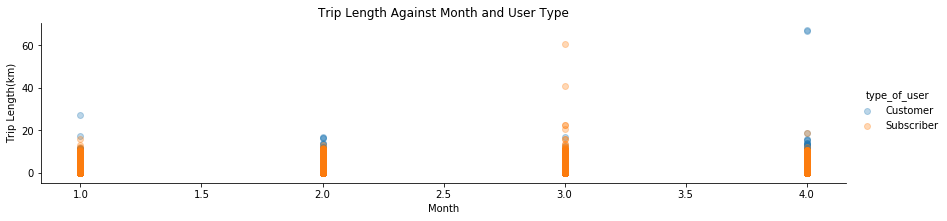

In [125]:
g = sb.FacetGrid(data =  df_merge, hue = 'type_of_user', aspect=4)
g.map(plt.scatter, 'start_month','distance', alpha = .3)
g.add_legend()
plt.title('Trip Length Against Month and User Type')
plt.xlabel('Month')
plt.ylabel('Trip Length(km)');

## Using ArcGIS to map routes

![East Bay](east.png)

![San Francisco](central.png)

![San Jose](south.png)

![Central](central.png)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> During the pandemic, we can see that there is a longer duration of trips for customers, but not an increase of distance. Since the rides were free for many customers, they just kept the bikes, but it looks like they took similar distance lengths (with some outliers). You can see that there are some customers that even go from the east bay into San Francisco, which were probably those longer trips. Looking at types of account against distance and duration of trip gave us a closer look into the behaviors of riders before and during the pandemic. 

### Were there any interesting or surprising interactions between features?

> In March, we saw a sharp decrease in the casual/non-member riders, since many of these riders were probably just for fun or an alternative to other forms of transportation. However, the members seemed to always ride similar patterns, inidcating that even in the pandemic, this is their main mode of transportation. 